#Practical session 1: Unsupervised Learning
#work of: Mohamed ISSA                        

In [66]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

#!pip update scikit-learn

Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


## Importing libraries

In [67]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as pl
import os as os
import sklearn
import sklearn.cluster as sk
import seaborn as sns
import pandas as pd

from numpy.core.fromnumeric import mean
from sklearn.metrics import adjusted_rand_score,rand_score
from IPython.core.pylabtools import figsize

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE


## 1  Loading the data

In [68]:
temper=np.load("sample_data/temper.npz")
digits=np.load("sample_data/digits.npz")

In [69]:
x1=temper["data"][:,:12]   #temperature for 12 months by city
lat=temper["data"][:,12]   #latitudes of the cities
lg=temper["data"][:,13]    #longitudes of the cities
villes=temper["villes"]    #names of the cities

x2=digits["x"]/255         #digits images
y2=digits["y"]             #digts labels

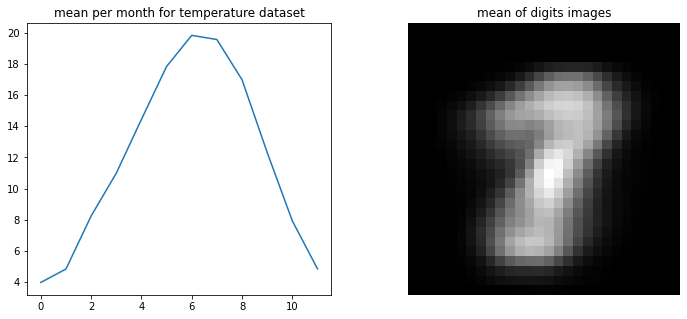

In [70]:
mean_x1=x1.mean(axis=0)
mean_x2=x2.mean(axis=0)

fig, axes = pl.subplots(1, 2,figsize=(12,5))
axes[0].plot(mean_x1)
axes[0].set_title("mean per month for temperature dataset")
axes[1].imshow(mean_x2.reshape((28,28)),cmap="gray")
axes[1].axis('off')
axes[1].set_title("mean of digits images")
pl.show()

For temperature dataset, we see that for the few first month the temperature is low starting from 4°C and it increases to reach 20°C then drops down. We can deduce that the measurements we have started at winter season and the top of the temperature is obtained for summer season.
For digit dataset, the mean figure don't show too much except we can see the presence of some sort of edges corresponding to some probable classes like '1' and '7' reflecting the predominant features in the dataset.

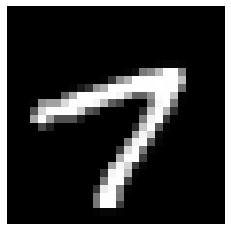

In [71]:
#play with ind to explore the dataset
ind=1010
pl.imshow(x2[ind,:].reshape((28,28)),cmap="gray")
pl.axis('off')
pl.show()

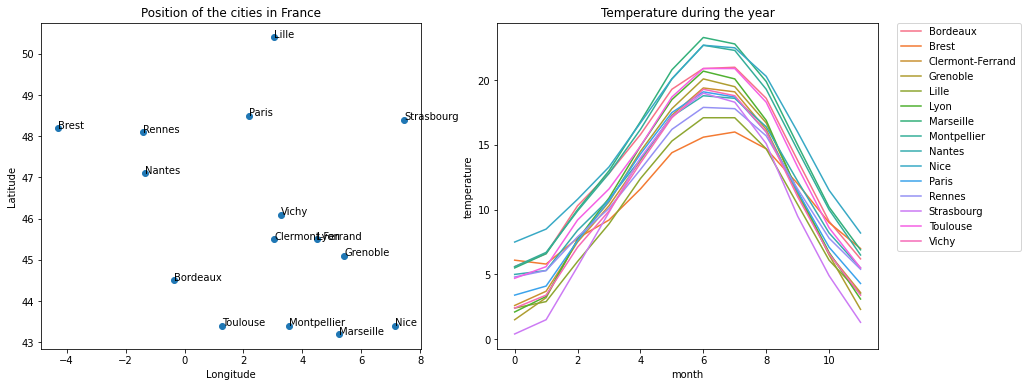

In [72]:
fig, axes = pl.subplots(1, 2,figsize=(15,6))

axes[0].scatter(lg,lat)
for i in range(15):
   axes[0].annotate(villes[i],(lg[i],lat[i]))
axes[0].set_title('Position of the cities in France')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

df=pd.DataFrame(columns=["month","temperature","ville"])
for i in range(15):
  for j in range(12):
    df=df.append({"month":j,"temperature":x1[i,j],"ville":villes[i]},ignore_index=True)
#pl.figure(figsize=(13,7))
axes[1].plot()
sns.lineplot(data=df,x="month", y="temperature", hue="ville")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[1].set_title('Temperature during the year')
pl.show()

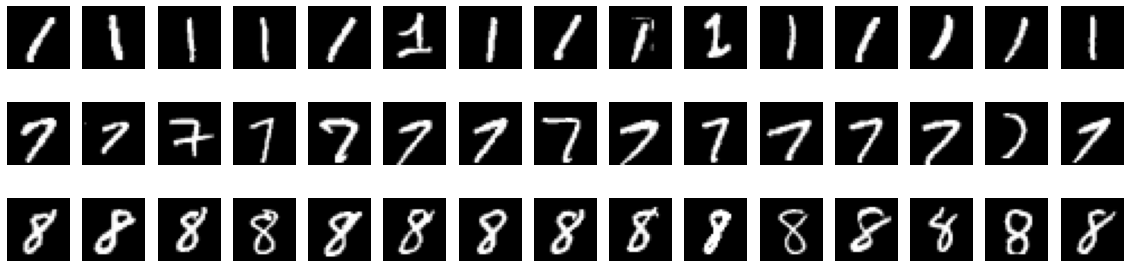

In [73]:
fig, axes = pl.subplots(3, 15,figsize=(20,5))
for i in range (3):
  for j in range(15):
    axes[i,j].imshow(x2[1000*i+j].reshape((28,28)),cmap="gray")
    axes[i,j].axis('off')

## 2  Clustering

###2.1  For both datasets 

In [74]:
#performing K_means on a given data
def K_means(K,data):
  km=sk.KMeans(n_clusters=K).fit(data)
  centroids = km.cluster_centers_
  pred=km.predict(data)
  return km,centroids,pred

#plotting centroids for temperature dataset
def plot_centroids(centroids,title):
  fig = pl.figure()
  ax = fig.add_subplot(1, 1, 1)
  for i in range(centroids.shape[0]):
    ax.plot(centroids[i,:], color='C{}'.format(i))
  ax.set_xlabel("month")  
  ax.set_ylabel("temperature")
  ax.set_title(title)


In [75]:
km_temp,centroids_temp,pred_temp=K_means(3,x1)

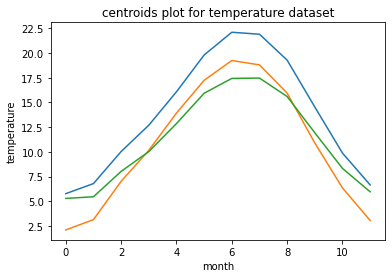

In [76]:
plot_centroids(centroids_temp,"centroids plot for temperature dataset")

On temperature dataset, the clustering was performed only on temperature values. The values of longitude and latitude don't determine the resulted centroids. 
We obtain 3 centroids corresponding to 3 clusters where the highest one corresponds to cities with high temperature all over the year. The second one corresponds to cities with low temperature in winter and high temperature in summer. Wheras the last centroid reflects slightly medium temperature in winter compared to the other centroids and slightly lower in summer. 

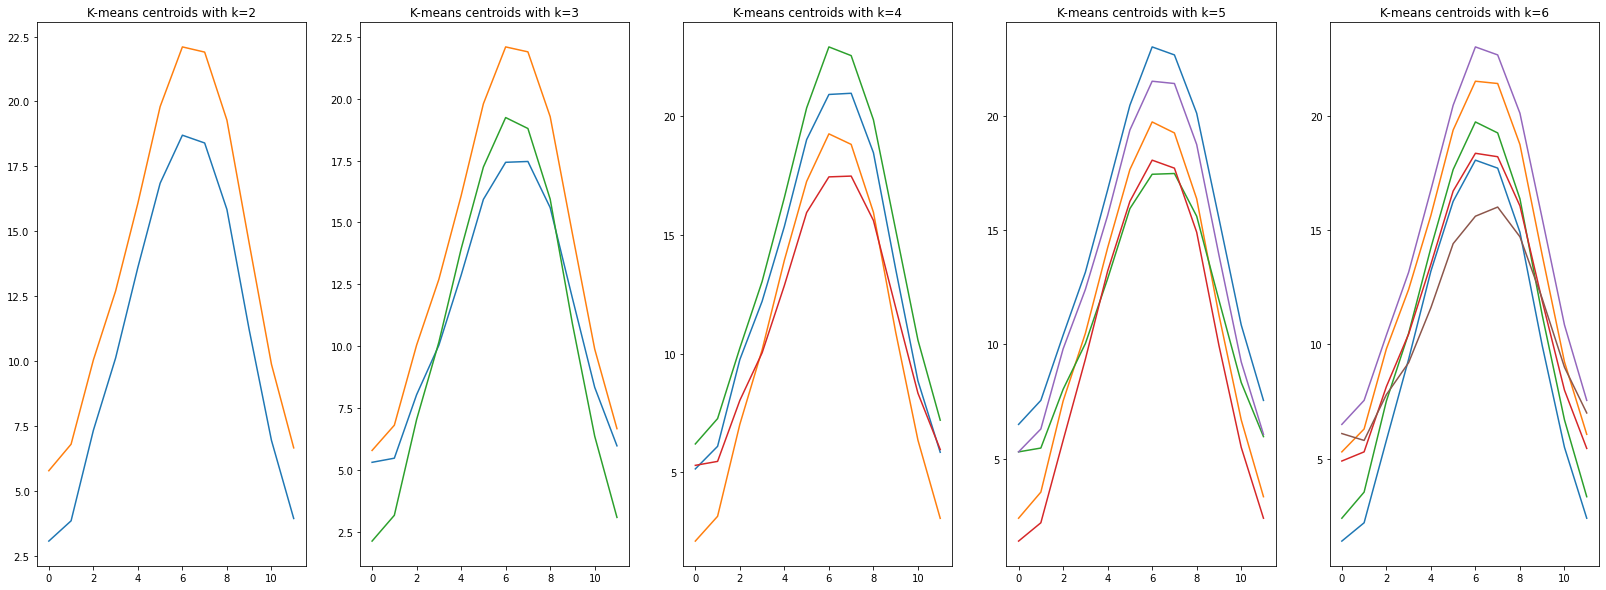

In [77]:
K_values=[2,3,4,5,6]
fig, axes = pl.subplots(1, 5,figsize=(28,10))
for i in range(len(K_values)):
  k=K_values[i]
  _,centroids_k,_=K_means(k,x1)
  for j in range(k):
    axes[i].plot(centroids_k[j,:])
  axes[i].set_title(f"K-means centroids with k={k}")


When we look at the obtained centroids in the above plots. We see that starting from a $k$ value of $4$ we get centroids that are much closer to each other. We no longer seperate clusters with different properties. The best results are obtained for $k=2$ and $k=3$. If we want a general clustering seperating cold cities from hot ones, the value of $k=2$ works the best by deviding dataset into two groups of high and low temperature. If we want to seperate more clusters the best value is $k=3$ that devides dataset into cold cities, hot hot ones and others with medium temperature.

In [78]:
km_dig,centroids_dig,pred_dig=K_means(3,x2)

(-0.5, 27.5, 27.5, -0.5)

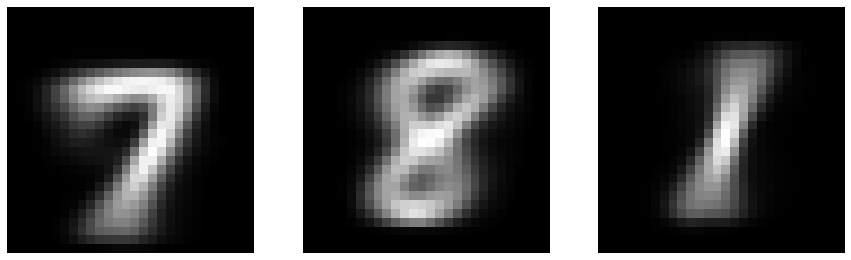

In [79]:
fig, axes = pl.subplots(1, 3,figsize=(15,10))
#fig.suptitle('centroids plot for digits dataset')
axes[0].imshow(centroids_dig[0,:].reshape((28,28)),cmap="gray")
axes[0].axis('off')
axes[1].imshow(centroids_dig[1,:].reshape((28,28)),cmap="gray")
axes[1].axis('off')
axes[2].imshow(centroids_dig[2,:].reshape((28,28)),cmap="gray")
axes[2].axis('off')

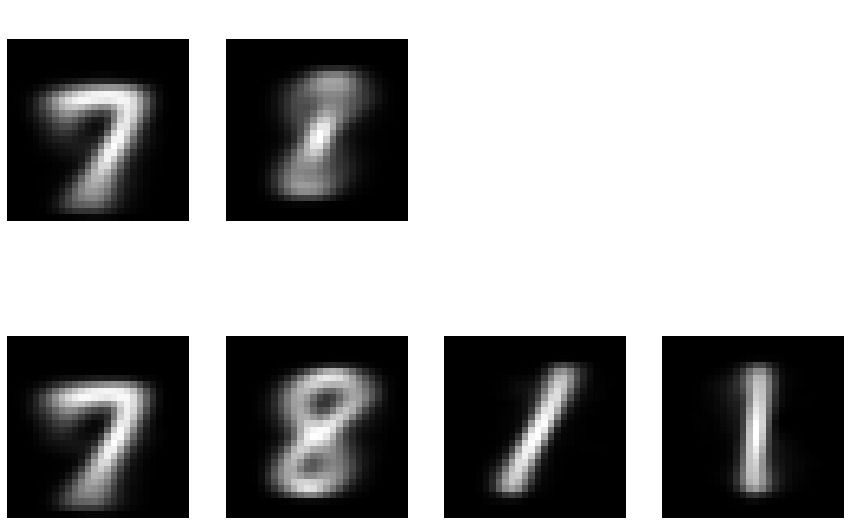

In [80]:
K=[2,4]
fig, axes = pl.subplots(2, 4,figsize=(15,10))
for i in range(len(K)):
  _,centroids_k,_=K_means(K[i],x2)
  for j in range(centroids_k.shape[0]):
    axes[i][j].imshow(centroids_k[j,:].reshape((28,28)),cmap="gray")
    axes[i][j].axis('off')
axes[0,2].axis('off')
axes[0,3].axis('off')
pl.show()

We tested Kmeans on digits dataset with $K$ values of $2$ and $4$. \\
For the case of $K=2$, we see that we obtained two centroids. One centroid corresponds to the class $7$ wheras the other one is not explicit with dominant features corresponding to the class $8$. \\
For the case of $K=4$ we obtained $4$ centroids where we can see clearly two centroids of classes $7$, and $8$. The other ones present the class $1$ that was split into two clusters. One of them corresponds to imagens where ones are written vertically. The other centroid corresponds to the images where the ones are inclined. \\
We see that by increasing the number $K$ we can extract more information and categories of one specific class. 



###2.2  Temperature dataset 

In [81]:
cl0=(pred_temp==0)
cl1=(pred_temp==1)
cl2=(pred_temp==2)
print(villes[cl0])
print(villes[cl1])
print(villes[cl2])

['Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse']
['Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy']
['Brest' 'Nantes' 'Rennes']


By looking at the names of the cities in each cluster, we see that the clustering makes sense. In fact, cities close to each other share approximately the same temperature evolution behavior. So putting close cities together is reasonable.

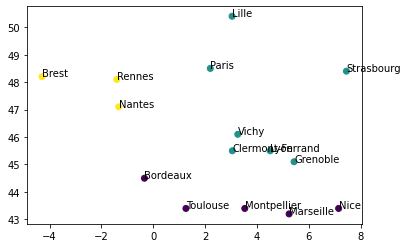

In [82]:
pl.scatter(lg, lat, c = pred_temp)
for i in range(15):
  pl.annotate(villes[i], (lg[i],lat[i]))

Thanks to the last scatter plot, we can clarify the intuition we had in the last question. We see that clustering over temperature values kept some geographical similarities among cities belonging to the same cluster. For example cities in the south ('Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse') have high temperature all over the year. Other cities such as ('Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy') are very cold in winter and quite hot in summer. The last cluster ('Brest' 'Nantes' 'Rennes') presents the group of cities with moderate temperature over the year.

###2.3  Digits dataset 

If we take a look to the centroids we obtained for the digits dataset, we see that undoubtly they resemble to the classes they present. However, we can say that they don't seem to be true images. In fact, these centroids are the averages of the three different classes. And in each class we have different representations of the digits (we recall the two groups we obtained for the class "$1$" when we performed Kmeans with $K=4$) and by averaging these images we get a contribution of each sample in the class that making the overall averaged image discernible. We see some degradation of pixels intensity we don't see in real images that is due to averaging. 

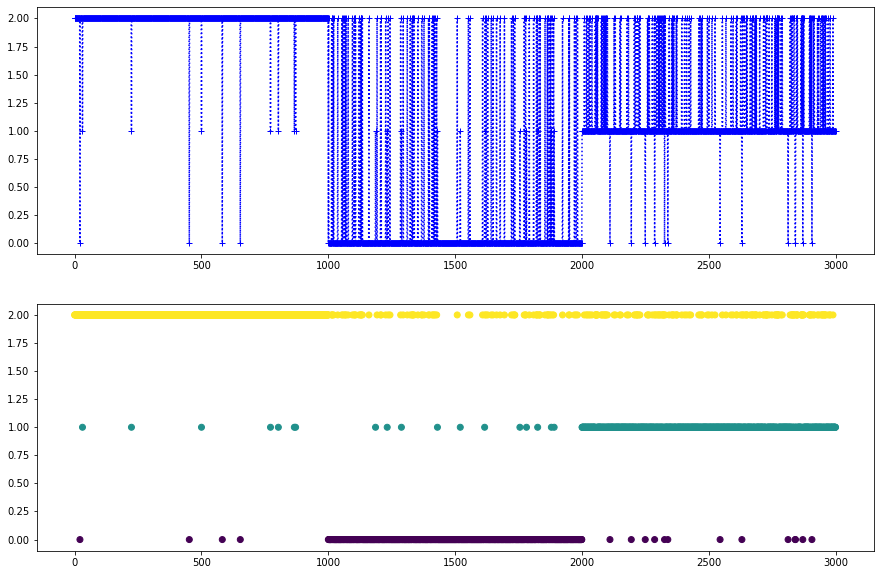

In [83]:
fig, axes = pl.subplots(2, 1,figsize=(15,10))
axes[0].plot(pred_dig,'b+',linestyle='dotted',linewidth=1.5)
axes[1].scatter(range(3000), pred_dig, c = pred_dig)
pl.show()
#pl.plot(pred_dig,linewidth=1)

We expect clustering with respect to the true class to be piecewise constant. However we see that there are some outliers that were not affected to their true classes. These outliers are important samples because they reflect the sensibilty of the model to the features. For example, for a "$1$" image that is written in inclined way, the model may associate the label "$7$" to that image. 

In [84]:
print("rand_score: {}".format(rand_score(y2[:,0],pred_dig)))
print("adjusted_rand_score: {}".format(adjusted_rand_score(y2[:,0],pred_dig)))

rand_score: 0.8839530954762699
adjusted_rand_score: 0.7405571626609085


Text(0, 0.5, 'adj_rand_score')

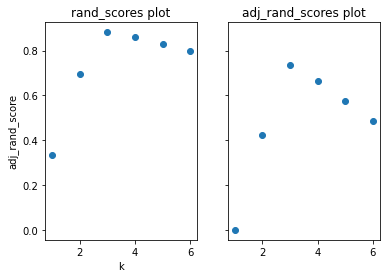

In [85]:
K=[1,2,3,4,5,6]
rand_scores=[]
adj_rand_scores=[]

for k in K:
  _,_,pred=K_means(k,x2)
  rand_scores.append(rand_score(y2[:,0],pred))
  adj_rand_scores.append(adjusted_rand_score(y2[:,0],pred))

fig, (ax1, ax2)= pl.subplots(1, 2,sharey=True)
ax1.scatter(K,rand_scores)
ax1.set_title("rand_scores plot")
ax1.set_xlabel("k")
ax1.set_ylabel("rand_score")
ax2.scatter(K,adj_rand_scores)
ax2.set_title("adj_rand_scores plot")
ax1.set_xlabel("k")
ax1.set_ylabel("adj_rand_score")

In [86]:
print(rand_scores.index(max(rand_scores)))
print(adj_rand_scores.index(max(adj_rand_scores)))

2
2


we obtained $2$ as the best index which corresponds to the Kmeans value of $K[2]=3$ which is an expected result as we know we have three different classes in our dataset.

##3  Density estimation

###  Temperature dataset

[0.66666671 0.33333329]


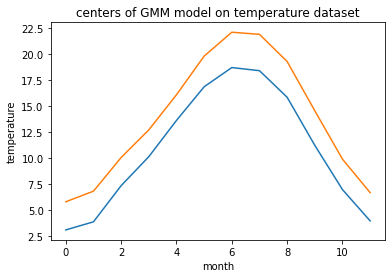

In [87]:
gmm_temp=GaussianMixture(n_components=2,covariance_type="diag")
gmm_temp.fit(x1)

centers_temp=gmm_temp.means_
print(gmm_temp.weights_)
plot_centroids(centers_temp,"centers of GMM model on temperature dataset")

By performing GMM model on temperature dataset with $K=2$, we obtain two centroids corresponding to the mean values of the two normal densities that approximate the data distribution. One designs the cluster of cold cities and the other one refers to hot ones.

[0.46666667 0.33333333 0.2       ]
[0.39982867 0.33333333 0.20017133 0.06666667]


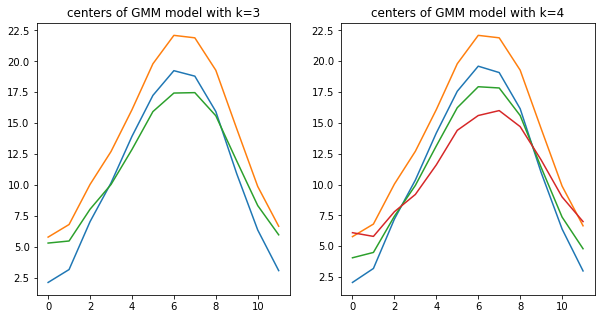

In [88]:
fig, axes = pl.subplots(1, 2,figsize=(10,5))
K=[3,4]
for k in K:  
  gmm=GaussianMixture(n_components=k,covariance_type="diag")
  gmm.fit(x1)
  print(gmm.weights_)
  centers_k=gmm.means_
  for j in range(k):
    axes[k-3].plot(centers_k[j,:])
    axes[k-3].set_title(f"centers of GMM model with k={k}")

The case of $K=3$ gives centroids that look quite the same as we did in the Kmeans part. With a covariance type 'diag' this case may be the best choice because the covariance matrix parameters are estimated on each cluster. But with few samples we can't ensure having trustworthy clustering. \\
With $K=4$, we obtain two centroids that are very close to each other. We reject this value due to the obtained centroids and to the number of parameters to estimate with few samples. \\
Also by looking at the weights of the mixture components we see that for the case of $K=4$ we have a weight of $0.066$ which is very close to $0$. So it's better to consider less number of components. \\
The weights of $K=3$ and $K=2$ are the most important. best values and we can ensure better clustering with $K=2$ as we can estimate better the parameters and so summarize better the data distribution.

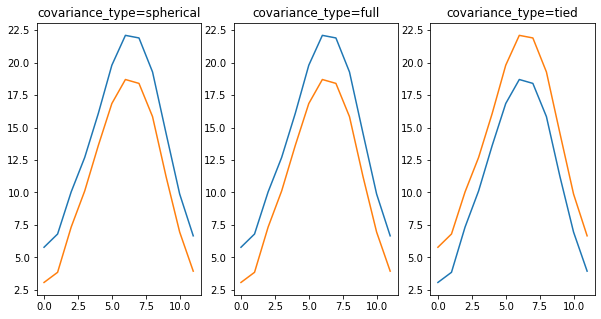

In [89]:
gmm_spherical=GaussianMixture(n_components=2,covariance_type="spherical")
gmm_full=GaussianMixture(n_components=2,covariance_type="full")
gmm_tied=GaussianMixture(n_components=2,covariance_type="tied")

gmm_spherical.fit(x1)
gmm_full.fit(x1)
gmm_tied.fit(x1)

centers_spherical=gmm_spherical.means_
centers_full=gmm_full.means_
centers_tied=gmm_tied.means_
centers=[centers_spherical,centers_full,centers_tied]
title=["covariance_type=spherical","covariance_type=full","covariance_type=tied"]
fig, axes = pl.subplots(1, 3,figsize=(10,5))
for i in range(3):
  for centr in centers[i]:
    axes[i].plot(centr)
  axes[i].set_title(title[i])

The centroids we got from changing the covariance matrix format look the same. As we don't have a lot of samples a parcimonious model would be more adequate. For example, the spherical and diag model are better in this case.

In [90]:
scores_temp=gmm_temp.score_samples(x1)
print(scores_temp)
L=sorted(scores_temp)

[-12.43200276 -30.66152562 -12.74903446 -16.06967722 -20.62541895
 -18.44314441 -13.02102214  -9.92980207 -17.20816322 -20.24013377
 -13.12603521 -14.98650196 -23.88056866 -21.49078828 -12.63133605]


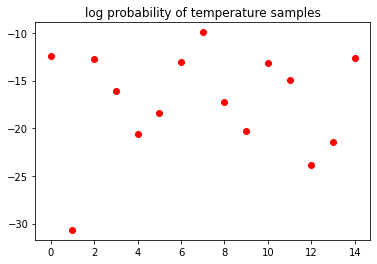

In [91]:
pl.plot(scores_temp,'ro')
pl.title("log probability of temperature samples")
pl.show()

outliers: ['Brest' 'Strasbourg']


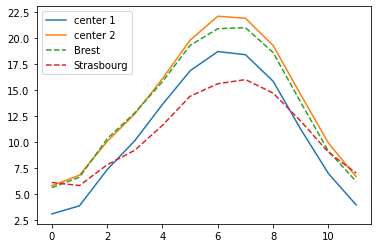

In [92]:
outl_num=2   #number of outlyers to consider
outl_temp=L[0:outl_num]
index_temp=[list(scores_temp).index(e) for e in outl_temp]

print("outliers: ",end='')
print(villes[index_temp])
fig = pl.figure()
ax = fig.add_subplot(1, 1, 1)
plots=[]
labels=["center 1", "center 2"] + list(villes[index_temp])
for i in range(centers_temp.shape[0]):
  p,=ax.plot(centers_temp[i,:], color='C{}'.format(i))
  plots.append(p)
for i in range(outl_num):
  p,=ax.plot(x1[i,:], f"C{i+2}--")
  plots.append(p)
pl.legend(plots,labels)
pl.show()

The two outliers plotted correspond to cities with least log probability. By considering a number of outliers of $2$ we get 'Brest' and 'Strasbourg'. These cities temperatures are quite distant from the means of the estimated densities. And that's why we get low values of log probability.  

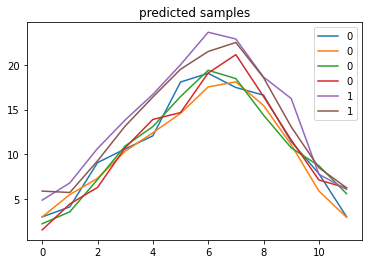

In [93]:
nb_samples=6
samples,labels=gmm_temp.sample(nb_samples)
#fig, axes = pl.subplots(1, nb_samples,figsize=(15,10))
for j in range(nb_samples):
    pl.plot(samples[j,:])
pl.title("predicted samples")
pl.legend(labels)
pl.show()

We see that the predicted samples we got look like the samples on which the densities were estimated. We can see that the generated samples belong to the two different classes presented by the gaussian densities.

### Digits dataset

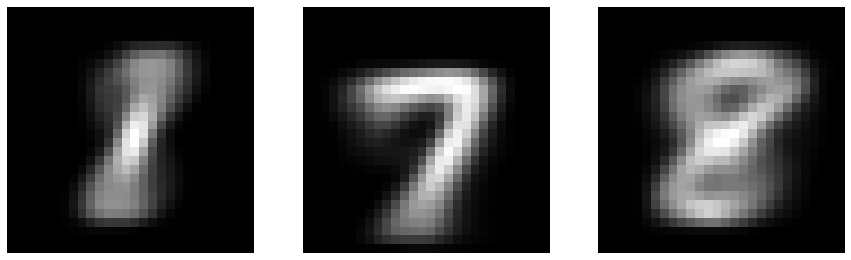

In [94]:
gmm_dig=GaussianMixture(n_components=3,covariance_type="diag")
gmm_dig.fit(x2)

centers_dig=gmm_dig.means_

fig, axes = pl.subplots(1, 3,figsize=(15,10))
#fig.suptitle('centers of GMM model on digits dataset')
axes[0].imshow(centers_dig[0,:].reshape((28,28)),cmap='gray')
axes[1].imshow(centers_dig[1,:].reshape((28,28)),cmap='gray')
axes[2].imshow(centers_dig[2,:].reshape((28,28)),cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
pl.show()

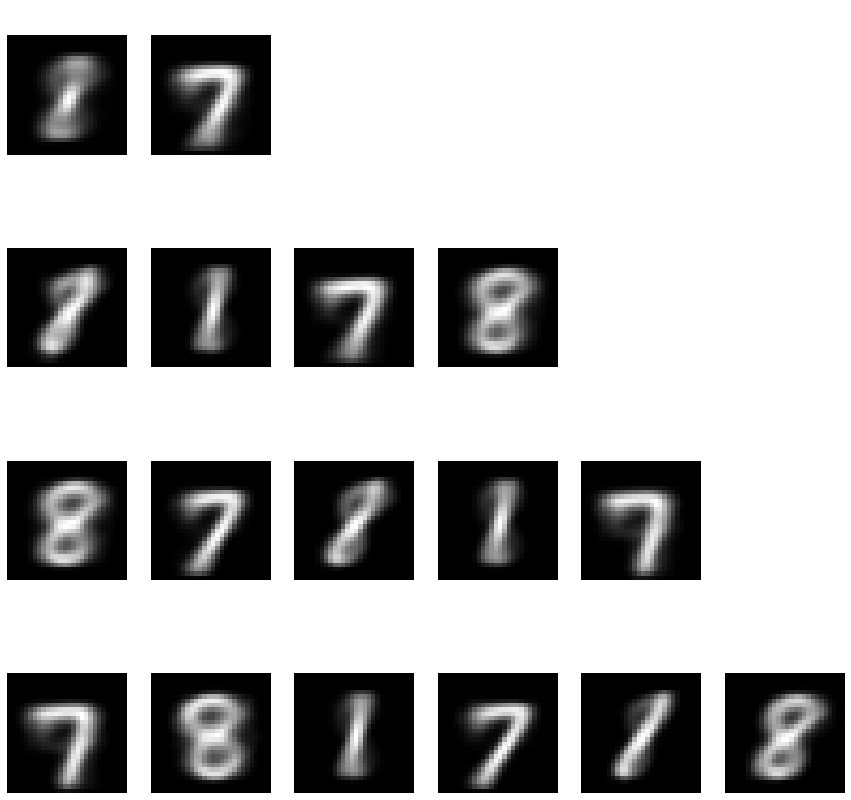

In [95]:
K=[2,4,5,6]
fig, axes = pl.subplots(len(K), max(K),figsize=(15,15))
for i in range(len(K)):  
  gmm=GaussianMixture(n_components=K[i],covariance_type="diag")
  gmm.fit(x2)
  #print(gmm.weights_)
  centers_k=gmm.means_
  for j in range(K[i]):
    axes[i,j].imshow(centers_k[j,:].reshape((28,28)),cmap='gray')
    axes[i,j].axis("off")
  if j<max(K)-1:
    for k in range(j+1,max(K)):
      axes[i,k].axis("off")

The choice of $K=2$ don't give good mean values of densities. We have a centroid that is presenting well the class $7$ but the other one looks like a mixture of classes $1$ and $8$. \\
For $K$ value of $4$ we see two centroids of $1$ and $7$ classes and two centroids showing two different shapes of the $8$. \\
For $K=5$ we got another mean value showing an image combination between class $1$ and $8$. \\
And for the case of $K=6$ we had clear shapes of each class with two centroids each.\\
The best value of $K$ to consider is $3$ corresponding to the number of available classes. If we want to take into account the shapes in each class we can consider the value $6$ that shows two different general shapes for each class.  

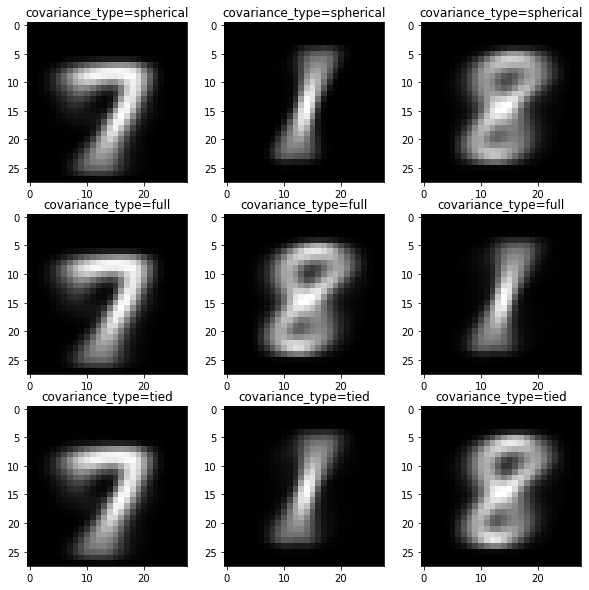

In [96]:
gmm_spherical=GaussianMixture(n_components=3,covariance_type="spherical")
gmm_full=GaussianMixture(n_components=3,covariance_type="full")
gmm_tied=GaussianMixture(n_components=3,covariance_type="tied")

gmm_spherical.fit(x2)
gmm_full.fit(x2)
gmm_tied.fit(x2)

centers_spherical=gmm_spherical.means_
centers_full=gmm_full.means_
centers_tied=gmm_tied.means_
centers=[centers_spherical,centers_full,centers_tied]
title=["covariance_type=spherical","covariance_type=full","covariance_type=tied"]
fig, axes = pl.subplots(3, 3,figsize=(10,10))
for i in range(3):
  for j in range(3):
    axes[i,j].imshow(centers[i][j].reshape((28,28)),cmap='gray')
    axes[i,j].set_title(title[i])

By comparing the resulted centroids for each type of covariance matrix, we see that the first centers corresponding to the case of spherical covariance matrix are of less quality. For example the centroid corresponding corresponding to the class $8$ is a liitle bit blured with low contrast between pixels. The two other covariance types show better results. However, the centroids we obtained with covariance type "diag" are of good quality compared to these results with less parameters to estimate.

In [97]:
scores_dig=gmm_dig.score_samples(x2)
Ld=sorted(scores_dig)

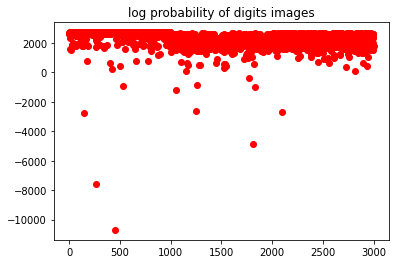

In [98]:
pl.plot(scores_dig,'ro')
pl.title("log probability of digits images")
pl.show()

<Figure size 432x288 with 0 Axes>

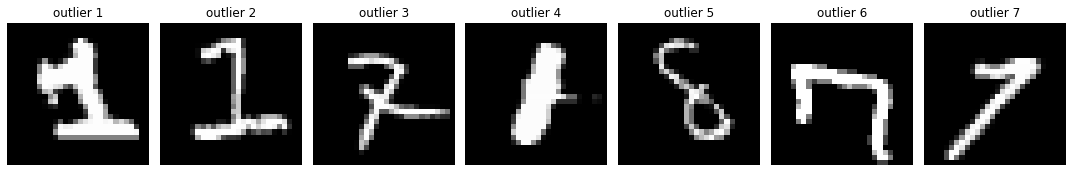

In [99]:
outl_num=7   #number of outlyers to consider
outl_dig=Ld[0:outl_num]
index_dig=[list(scores_dig).index(e) for e in outl_dig]

#print("outlyers: ",end='')
#print(villes[index_temp])
fig = pl.figure()
fig, axes = pl.subplots(1, outl_num,figsize=(15,15))
#fig.suptitle('centers of GMM model on digits dataset')
for index,e in enumerate(index_dig):
  axes[index].imshow(x2[index_dig[index],].reshape((28,28)),cmap='gray')
  axes[index].set_title(f"outlier {index+1}")
  axes[index].axis("off")
pl.tight_layout()
pl.show()

For the outlier images we got, we see that these images are not so easy to classify even for human. For example, the outlier $4$ may belong to class $8$ but with the vertical shape and the absence of curves it's not easy to classify it as $8$. The same for outlier $6$ and the outlier $7$ who may belongs to class $1$ or $7$.

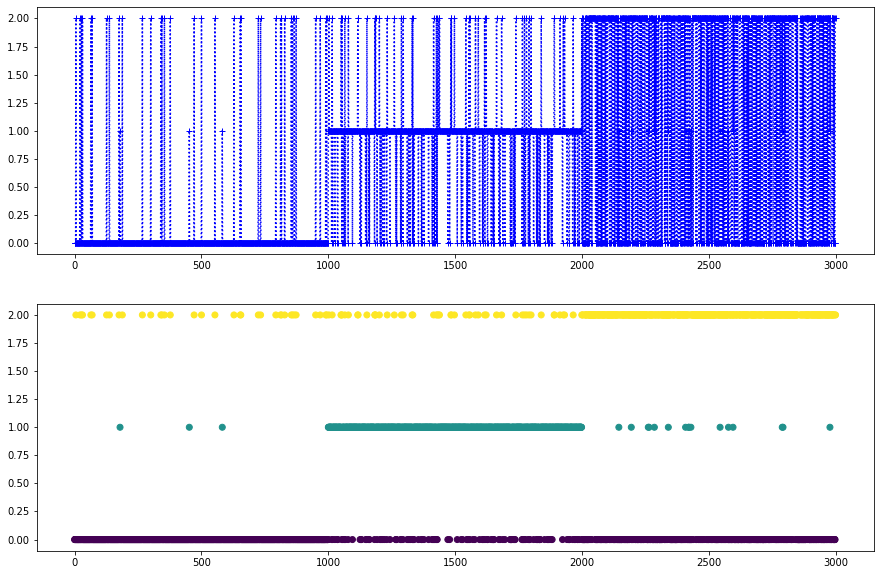

In [100]:
predictions=gmm_dig.predict(x2)

fig, axes = pl.subplots(2, 1,figsize=(15,10))
axes[0].plot(predictions,'b+',linestyle='dotted',linewidth=1.5)
axes[1].scatter(range(3000), predictions, c = predictions)
#pl.plot(pred_dig,linewidth=1)


In [101]:
print("rand_score: {}".format(rand_score(y2[:,0],predictions)))
print("adjusted_rand_score: {}".format(adjusted_rand_score(y2[:,0],predictions)))

rand_score: 0.76156474380349
adjusted_rand_score: 0.48072606373955995


We had better clustering rand scores with the Kmeans model. For the case of digit dataset, we have too many variables $(784)$ which lead to estimating a model of $3+3*(784+784)=4707$ parameters. Since we have a prior knowledge on the classes of the dataset, we know that Kmeans with $K$ value of $3$ would give better classification results. 

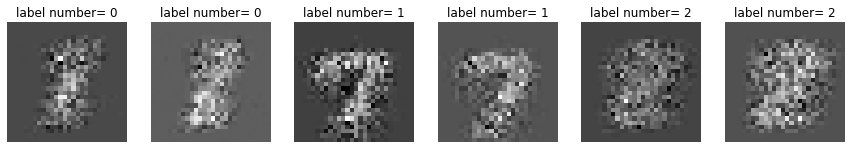

In [102]:
nb_samples=6
samples,labels=gmm_dig.sample(nb_samples)
fig, axes = pl.subplots(1, nb_samples,figsize=(15,10))
for i in range(nb_samples):
  axes[i].imshow(samples[i].reshape((28,28)),cmap="gray")
  axes[i].set_title(f"label number= {labels[i]}")
  axes[i].axis('off')
pl.show()

We see that we don't get accurate generated samples. We can hardly guess the class of some images and for others we can't determine their classes. The obtained images don't resemble a lot to the data on which density estimation was performed. If we had more samples we could have got better quality images.

##4  Dimensionality reduction


###4.1 Linear Projection : Principal Component Analysis

#### Temperature dataset

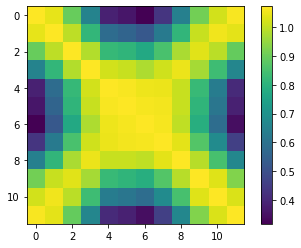

In [103]:
scaler = StandardScaler()
scaled_x1 = scaler.fit_transform(x1) 

ax = pl.subplot()
M_temp=np.cov(scaled_x1.T)
pl.imshow(M_temp)
pl.colorbar()
pl.show()

The covariance matrix shows the covariance between each two month variables. We see that there's a high correleation for months that are close to each other. For example the center of the colorbar shows the correlation between summer months. We see a yellow color reflecting high correlation. The same is for the corners of the colorbar showing a high correlation between winter months. And the dark parts reflect no correlation between cold and hot seasons. We can say that close months tend to have close temperature variation.

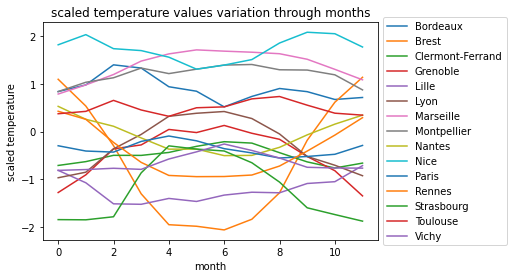

In [104]:
pca=PCA(n_components=None)
X_tmp=pca.fit(scaled_x1)                
for i in range(x1.shape[0]):
  pl.plot(scaled_x1[i,:])
pl.title("scaled temperature values variation through months")
pl.xlabel("month")
pl.ylabel("scaled temperature")
pl.legend(villes,loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

-*comment on scaled temperature data*: \\
We see that we have positive and negative "algebric" values of temperature depending on the value of the temperature compared to the mean value. We note also the presence of some curves. For example, for "Marseille" which is the hottest city in summer and so contributes with the largest part to the mean, we note that it has a curve oriented up. On the other part, for Brest and Rennes for example their curve is oriented down and is negative which is explained by low contribution to the temperature mean value in summer and the absence of a pic temperature value. This explains the moderate temperature values of these cities as discussed previously.     

total explained variance= 98.818%


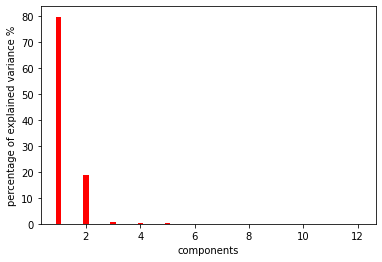

In [105]:
var_tmp=X_tmp.explained_variance_ratio_
pl.bar(range(1,13),var_tmp*100,width = 0.2, color = 'red')
pl.xlabel("components")
pl.ylabel("percentage of explained variance %")
print(f"total explained variance= {(var_tmp[0]+var_tmp[1])*100:.3f}%")
pl.show()

The most importatn information is stocked in the two first components. By projection on these principal components we preserve an amount of information equal to the some of the two first explained variances: $98.82\%$ which resumes approximately the whole information.

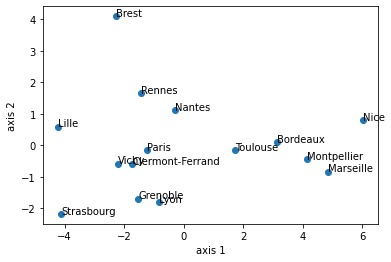

In [106]:
pca=PCA(n_components=2)
Xp_tmp=pca.fit_transform(scaled_x1)
pl.scatter(Xp_tmp[:,0],Xp_tmp[:,1])
pl.xlabel("axis 1")
pl.ylabel("axis 2")
for i in range(15):
  pl.text(Xp_tmp[i,0],Xp_tmp[i,1],villes[i])

By projecting samples on the two first components we see that the information of geographical location is preserved. In fact as we said in the previous section, geographical location is highly correlated to temperature variation. And so by doing a pca preserving $98.82\%$ of information we recover as well this correlation between projected samples and their geographical location property. For example, we see that the cities are "distant" from each other the way they are in the scatter plot of geographical location. Cities in the south ('Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse') are close to each other. The same is for ('Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy') and ('Brest' 'Nantes' 'Rennes'). We see also that the projection has preserved the distancy of 'Brest' and 'Strasbourg'.

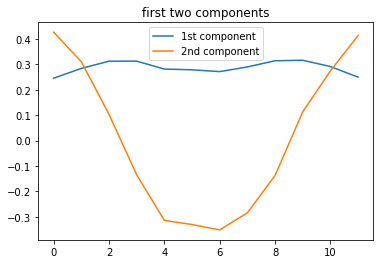

In [107]:
D=pca.components_.T
fig = pl.figure()
ax = fig.add_subplot(1, 1, 1)
labels=["1st component", "2nd component"]

p0,=ax.plot(D[:,0])
p1,=ax.plot(D[:,1])

pl.legend([p0,p1],labels)
pl.title("first two components")
pl.show()

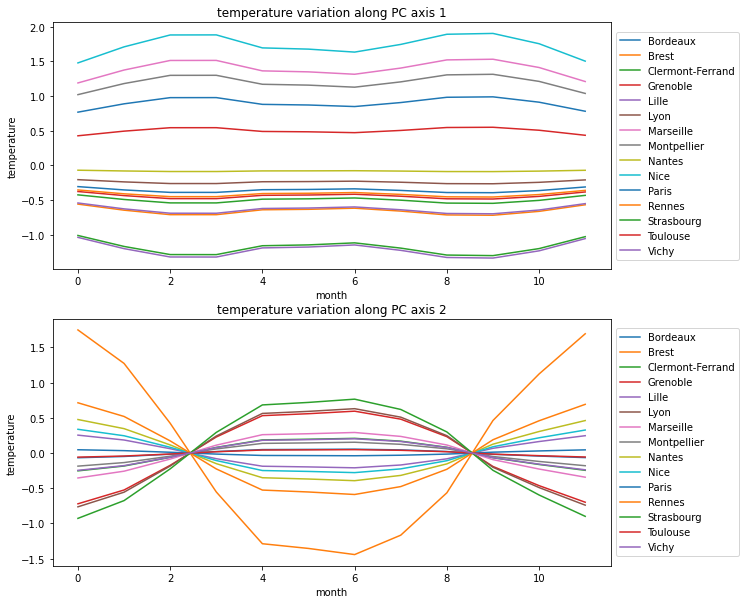

In [108]:
fig, axes = pl.subplots(2, 1,figsize=(10,10))
for i in range(15):
  ax1=Xp_tmp[i,0]*D[:,0]
  ax2=Xp_tmp[i,1]*D[:,1]
  axes[0].plot(ax1)
  axes[0].set_title("temperature variation along PC axis 1")
  axes[0].set_xlabel("month")
  axes[0].set_ylabel("temperature")
  axes[0].legend(villes,loc='center left', bbox_to_anchor=(1, 0.5))
  axes[1].plot(ax2)
  axes[1].set_xlabel("month")
  axes[1].set_ylabel("temperature")
  axes[1].set_title("temperature variation along PC axis 2")
  axes[1].legend(villes,loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

To determine the impact of moving along each component direction we rely on the tempertaure variation along PC axis 1 and 2. \\
The axis 1 gives the general temperature along the year for each city. Moving along this axis resumes the yearly temperature of a city. It opposes cold cities and hot ones. And in the middle we find cities with medium temperature such as 'Nantes'. \\
Moving along axis 2 gives an idea about the variability of temperature. Cities with positive values reflect having temperature values higher than average and negative values reflect temperature values less than average. Moving along the time axis (months) we can see the dynamic of seasonality of cities. For example, 'Brest' and 'Rennes' tend to have warm weather in winter and less hotter in summer than other cities. However cities like 'Marseille' and 'Toulouse' tend to have hot weather than summer and quite cold in winter. cities with nearly low variability have low variability in their temperature.

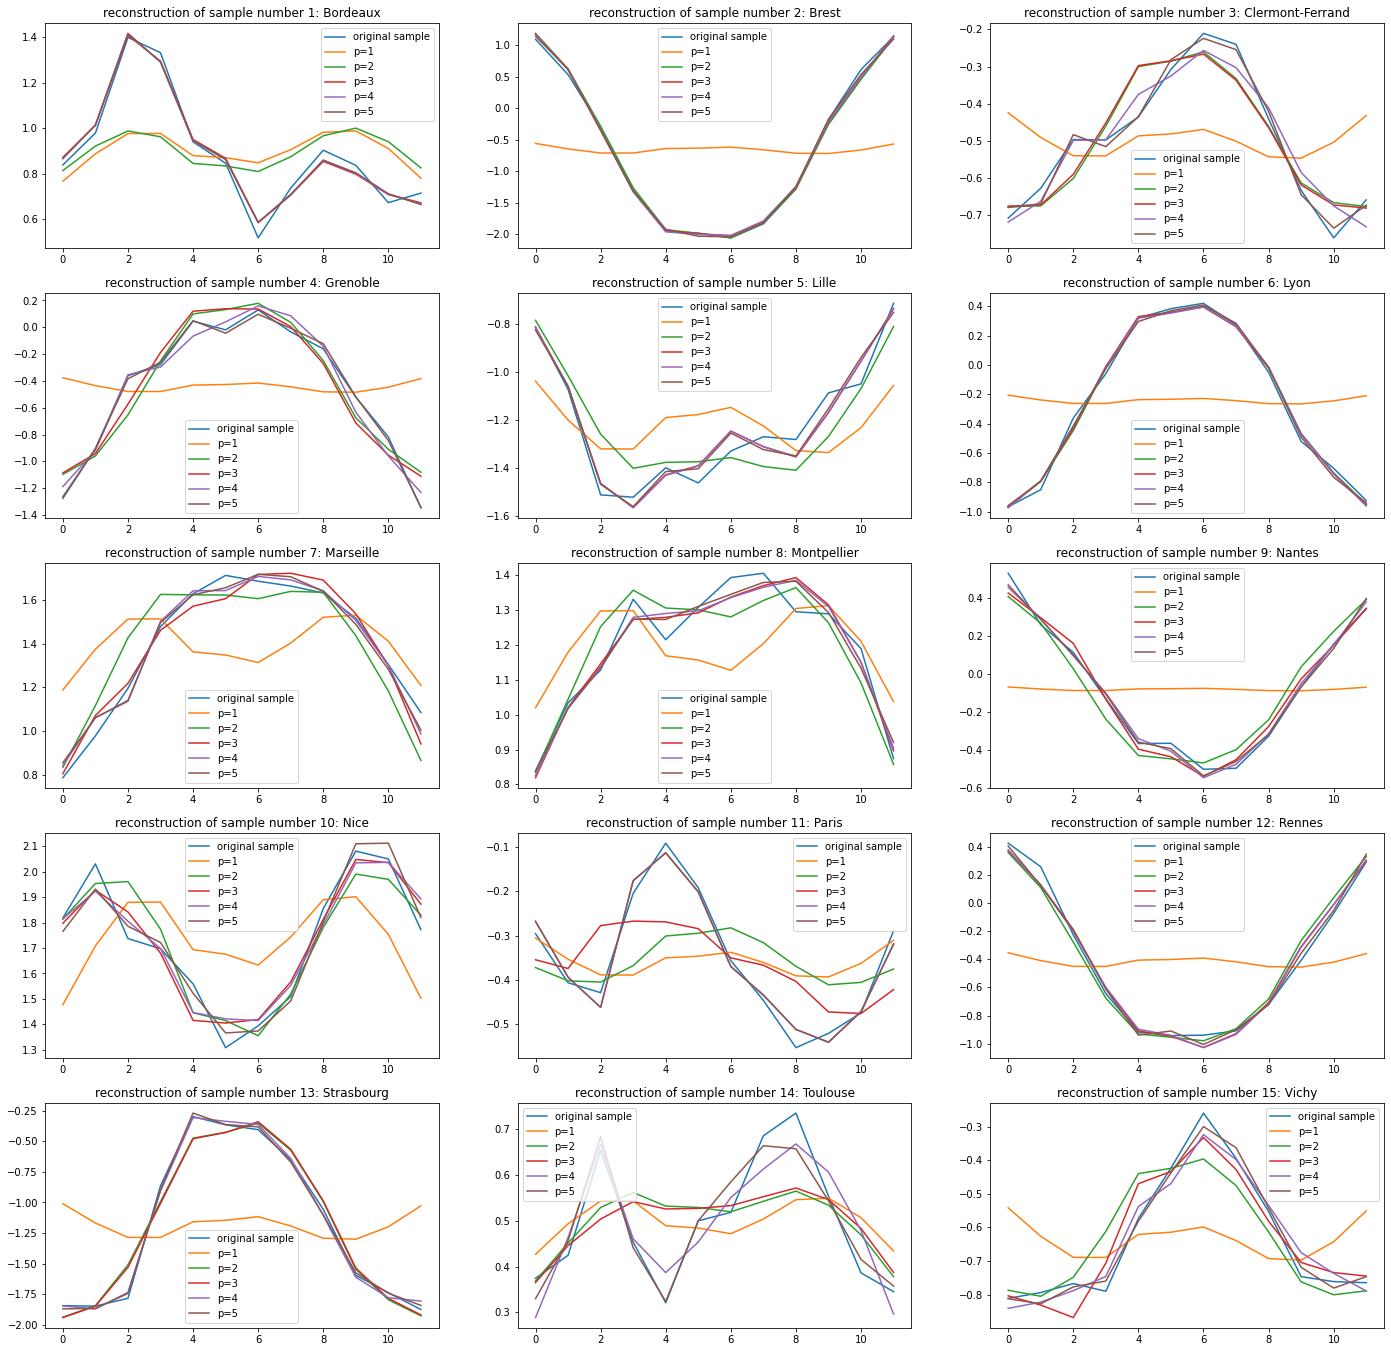

In [109]:
fig,axes=pl.subplots(5,3,figsize=(24,24))

P=[1,2,3,4,5]
for i in range(15):
    sample=scaled_x1[i,:]
    axes.flatten()[i].plot(sample,label="original sample")
    axes.flatten()[i].set_title(f"reconstruction of sample number {i+1}: "+villes[i])

for p in P:
  pca=PCA(n_components=p)
  Xp_tmp=pca.fit_transform(scaled_x1)
  reconst=pca.inverse_transform(Xp_tmp)
  for i in range(15):
    reconst_sample=reconst[i,:]
    axes.flatten()[i].plot(reconst_sample,label=f"p={p}")

for ax in axes.flatten():
  ax.legend()
pl.show()

For each sample, the construction quality depends on the $p$ number of components on which we choose to do the construction on. In general the case of $p=1$ gives a reconstruction that is not very close to the original sample. For $p=2$ we can have a reconstruction that is very similar to the original sample for the most of them such as ('Brest', 'Lyon', 'Rennes'). For other samples we need also the third dimension to have a close reconstruction like the case of 'Bordeaux'. 

##### NMF on Temperature dataset

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 300 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr

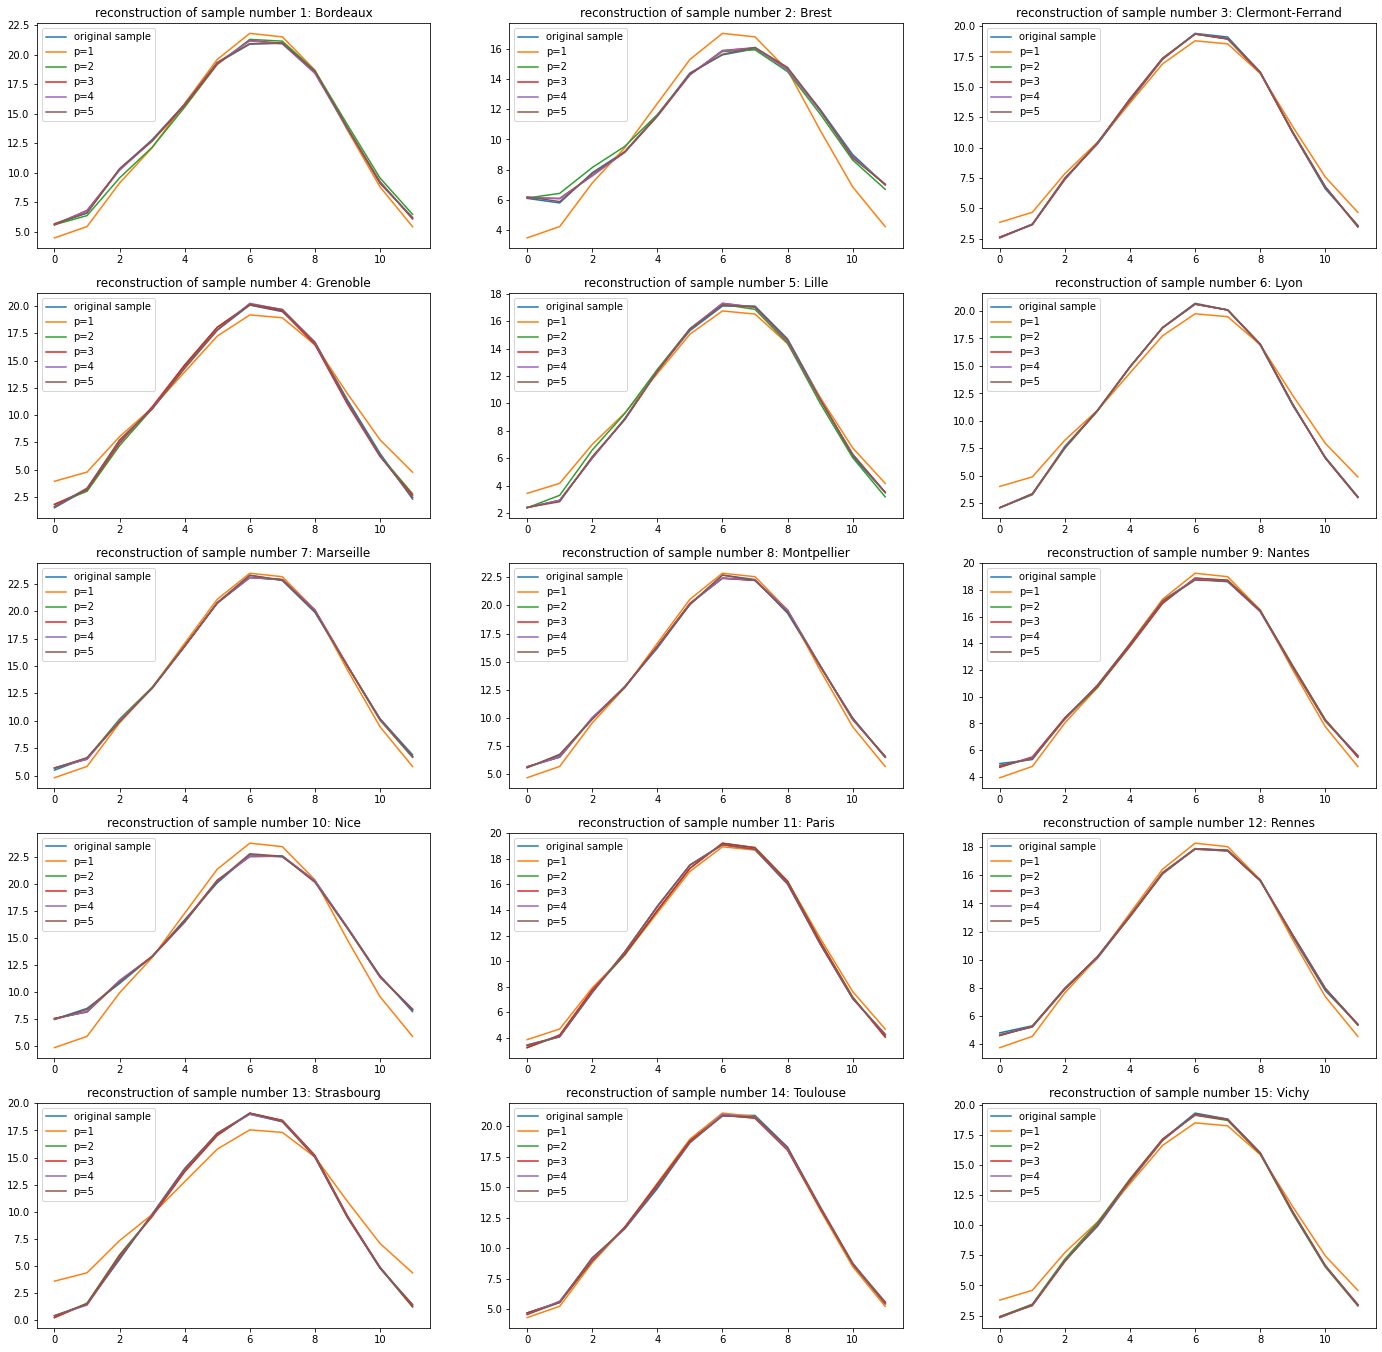

In [110]:
fig,axes=pl.subplots(5,3,figsize=(24,24))

P=[1,2,3,4,5]
for i in range(15):
    sample=x1[i,:]
    axes.flatten()[i].plot(sample,label="original sample")
    axes.flatten()[i].set_title(f"reconstruction of sample number {i+1}: "+villes[i])

for p in P:
  nmf=NMF(n_components=p,max_iter=300)
  nmf_tmp=nmf.fit_transform(x1)
  reconst_nmf=nmf.inverse_transform(nmf_tmp)
  for i in range(15):
    reconst_sample=reconst_nmf[i,:]
    axes.flatten()[i].plot(reconst_sample,label=f"p={p}")

for ax in axes.flatten():
  ax.legend()

pl.show()

We see that NMF model captures fast the curves of the temperature dataset. For one single component we had good results for some cities such as Toulouse Paris and Marseille and for other regions the reconstruction could capture the curves. For larger values of components we get a good fit on the dataset with good reconstructions.

#### Digits dataset

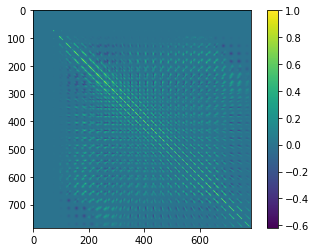

In [111]:
scaled_x2 = scaler.fit_transform(x2) 

ax = pl.subplot()
M_dig=np.cov(scaled_x2.T)
pl.imshow(M_dig)
pl.colorbar()
pl.show()

In the case of digits, we shoud see the variables also as the pixels of the images.
In the covariance matrix, we see on the diagonal that there is a high correlation between close variables. The other visible important values of correlations are between close pixels. In terms of variables they are seperated by a shift of $+/-28+/-i$ where $i \in \{0,1,2\}$. These close pixels capture the features of the images (high or low intensity).

In [112]:
pca=PCA(n_components=None)
X_dig=pca.fit(scaled_x2)

total explained variance= 14.854%


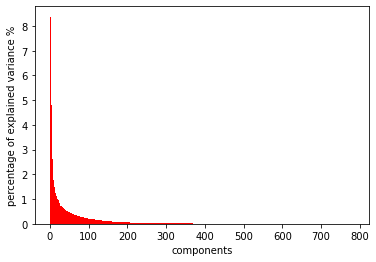

In [113]:
var_dig=X_dig.explained_variance_ratio_
pl.bar(range(1,785),var_dig*100,width = 2.5, color = 'red')
pl.xlabel("components")
pl.ylabel("percentage of explained variance %")
print(f"total explained variance= {(var_dig[0]+var_dig[1])*100:.3f}%")
pl.show()

By projecting on the two first components, we preserve an amount of information equal to the some of the two first explained variances: $14.854 \%$ which is a low value. By doing a PCA on digits dataset with $p=2$, we lose an important amount of information.

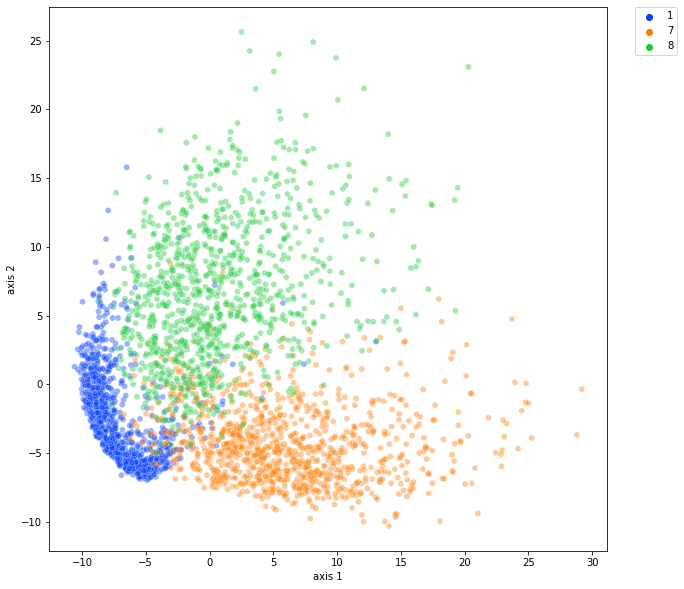

In [114]:
pca=PCA(n_components=2)
Xp_dig=pca.fit_transform(scaled_x2)

pl.figure(figsize=(10,10))
df=pd.DataFrame({"axis 1":Xp_dig[:,0],"axis 2":Xp_dig[:,1],"y":y2.reshape(-1)})
sns.scatterplot(x="axis 1",y="axis 2",hue="y",alpha=0.4,data=df,palette="bright")
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.show()

By projecting digits dataset on the two first components, we see that a part of the information over dataset classes was preserved. The above plot shows $3$ groups of classes with some overlapping between them. The way we see how the class $7$ is interfering with other classes may be due to the loss of a considerable amount of information after projecting the data.

<Figure size 432x288 with 0 Axes>

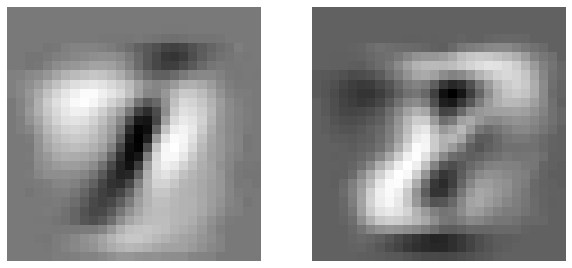

In [115]:
D=pca.components_.T
fig = pl.figure()
fig, axes = pl.subplots(1, 2,figsize=(10,5))
labels=["1st component", "2nd component"]

axes[0].imshow(D[:,0].reshape((28,28)),cmap="gray")
axes[0].axis("off")
axes[1].imshow(D[:,1].reshape((28,28)),cmap="gray")
axes[1].axis("off")
pl.show()

These two components present two seperate features in the dataset. We see that in the difference between regions of high intensity. The first one, is characterised by high intensity on the left and right of the image with low nclined intenity in the center (in the shape of $1$) when the other one captures the curves in images that are highly present in the digits of class $8$. \\
We can determine the impact of moving along these directions using the components plot and the visualization of projected samples. \\
We see that digits of class $7$ have positive and high values on the axis $1$ wheras digits of class $1$ have negative values on the axis $1$. That means that the first component opposes these two classes. Having high values on the first component for digits of class $7$ gives high intensity values to the features that are captured by the first component that are more present in this class. However having negative values on the first component for digits of class $1$ lowers the high intensities captured by this component and highlights low intensities that we see in the center in black color with the shape of $1$. \\
For the axis $2$, we see that digits of the class $8$ have high values on this axis wheras the other digits samples have generally negative values on this axis especially for the class $7$. Digits of class $8$ are in the shape of the second component where we see high curved intensities. By this, we understand that the axis $2$ opposes images with curved featured (the class $8$) from images with straight lines features (class $1$ and $7$). 


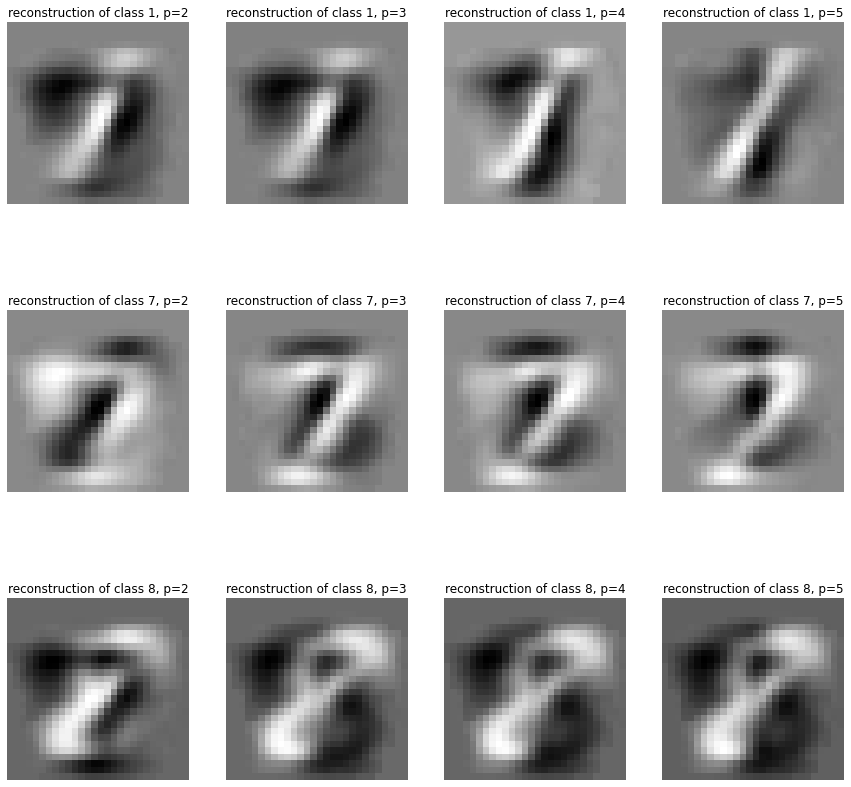

In [116]:
fig,axes=pl.subplots(3,4,figsize=(15,15))

P=[2,3,4,5]
cl=[1,7,8]
for p in P:
  pca=PCA(n_components=p)
  Xp_dig=pca.fit_transform(scaled_x2)
  reconst=pca.inverse_transform(Xp_dig)
  for i in range(0,3):
    reconst_sample=reconst[i*1000,:]
    axes[i,p-2].imshow(reconst_sample.reshape(28,28),cmap="gray")
    axes[i,p-2].set_title(f"reconstruction of class {cl[i]}, p={p}")
    axes[i,p-2].axis("off")

We see that as long as we increase the $p$ number of components we use for reconstructing images we get better quality images. With low values of $p$ ($p=2$ for example), we have low contrast of intensity. And when we increase the value of $p$ we take into consideration more information and we see how the images have better contrast and resemble better to original ones. 

##### NMF on digits

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed fro

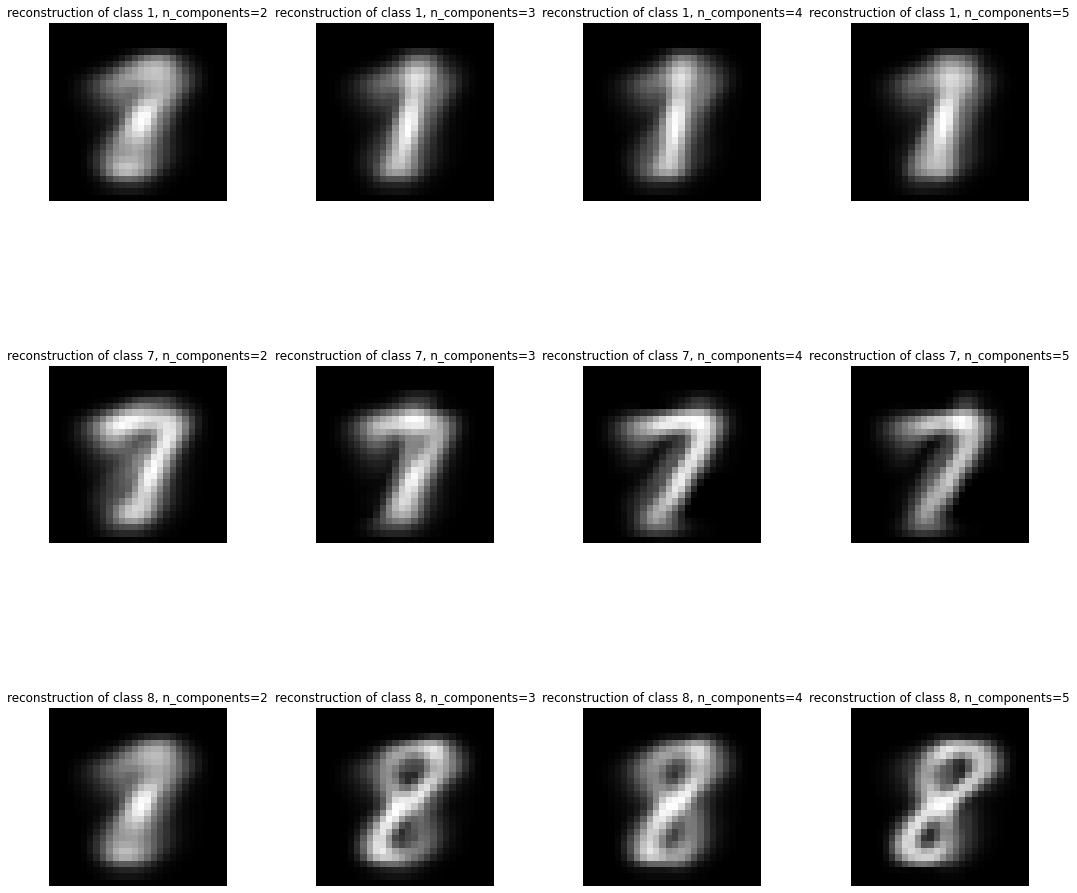

In [117]:
fig,axes=pl.subplots(3,4,figsize=(15,15))

P=[2,3,4,5]

for p in P:
  nmf=NMF(n_components=p,max_iter=500)
  nmf_dig=nmf.fit_transform(x2)
  reconst_nmf=nmf.inverse_transform(nmf_dig)
  for i in range(0,3):
    reconst_sample=reconst_nmf[i*1000+5,:]
    axes[i,p-2].imshow(reconst_sample.reshape(28,28),cmap="gray")
    axes[i,p-2].set_title(f"reconstruction of class {cl[i]}, n_components={p}")
    axes[i,p-2].axis('off')
pl.tight_layout()
pl.show()

For digits dataset, we see that performing NMF gives good reconstruction resluts that are far away better than PCA. NMF learns well the intensity regions of features. and we see the absence of intensity in the other regions (black regions). As we increase the number of components we get better quality images.

###4.1 Manifold Learning : TSNE

#### Temperature dataset

In [118]:
model=TSNE(n_components=2)

In [119]:
TSNE_tmp=model.fit_transform(x1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


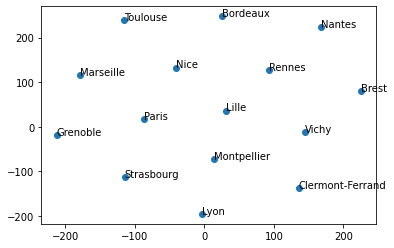

In [120]:
pl.scatter(TSNE_tmp[:,0], TSNE_tmp[:,1])
for i in range(15):
  pl.text(TSNE_tmp[i,0],TSNE_tmp[i,1],villes[i])

We don't see any clusters with the default value of perplexity. Projected samples are equidistant from each other. 

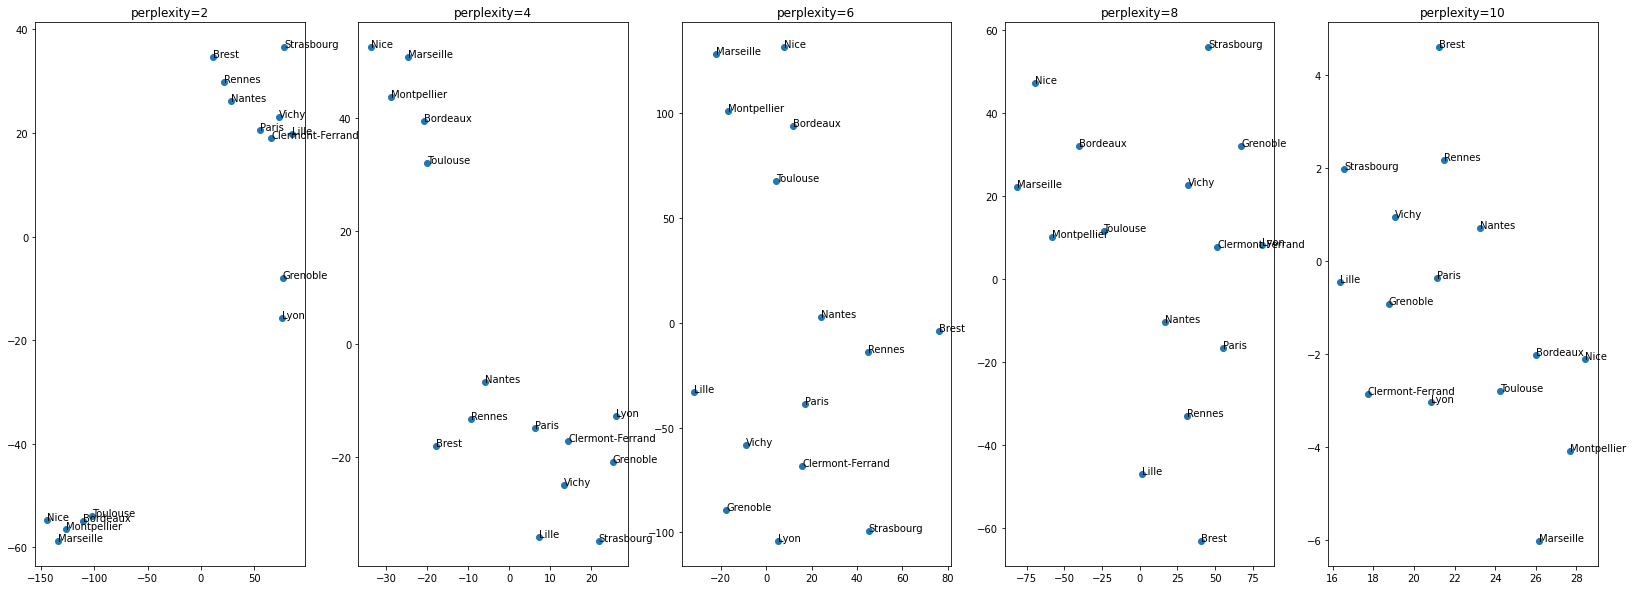

In [121]:
P=[2+2*i for i in range(5)]

fig,axes=pl.subplots(1,5,figsize=(28,10))

for i in range(5):
  model=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=P[i])
  R=model.fit_transform(x1)
  axes[i].scatter(R[:,0], R[:,1],  cmap='tab20b')
  axes[i].set_title(f"perplexity={P[i]}")
  for j in range(15):
    axes[i].text(R[j,0],R[j,1],villes[j])

We see that for perplexity values of $2$ and $4$ we got the clusters we had in the case of Kmeans and Density estimation with better seperation between clusters for the value of $4$. For larger values, samples tend to move away from each other.

#### Digits dataset

In [122]:
TSNE_digits=model.fit_transform(x2)

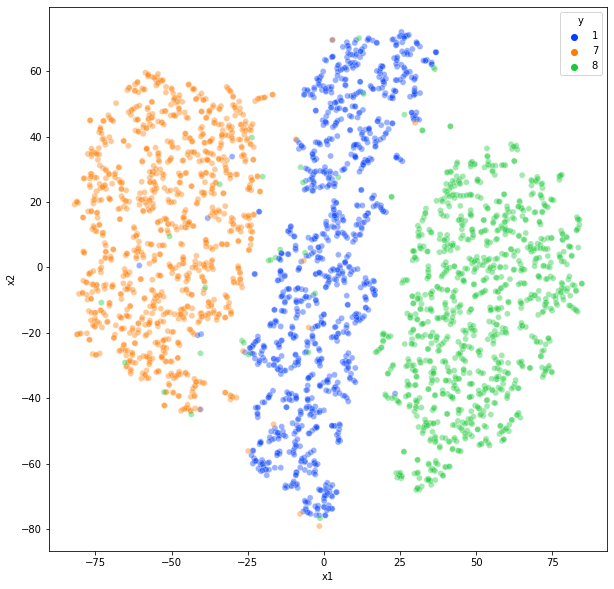

In [123]:
pl.figure(figsize=(10,10))
df=pd.DataFrame({"x1":TSNE_digits[:,0],"x2":TSNE_digits[:,1],"y":y2.reshape(-1)})
sns.scatterplot(x="x1",y="x2",hue="y",alpha=0.4,data=df,palette="bright")

The default value of perplexity gives a good seperation between samples classes. We see spaced clusters of the dataset with some outliers. This visualisation is far away better then the case of PCA performed on digits dataset.

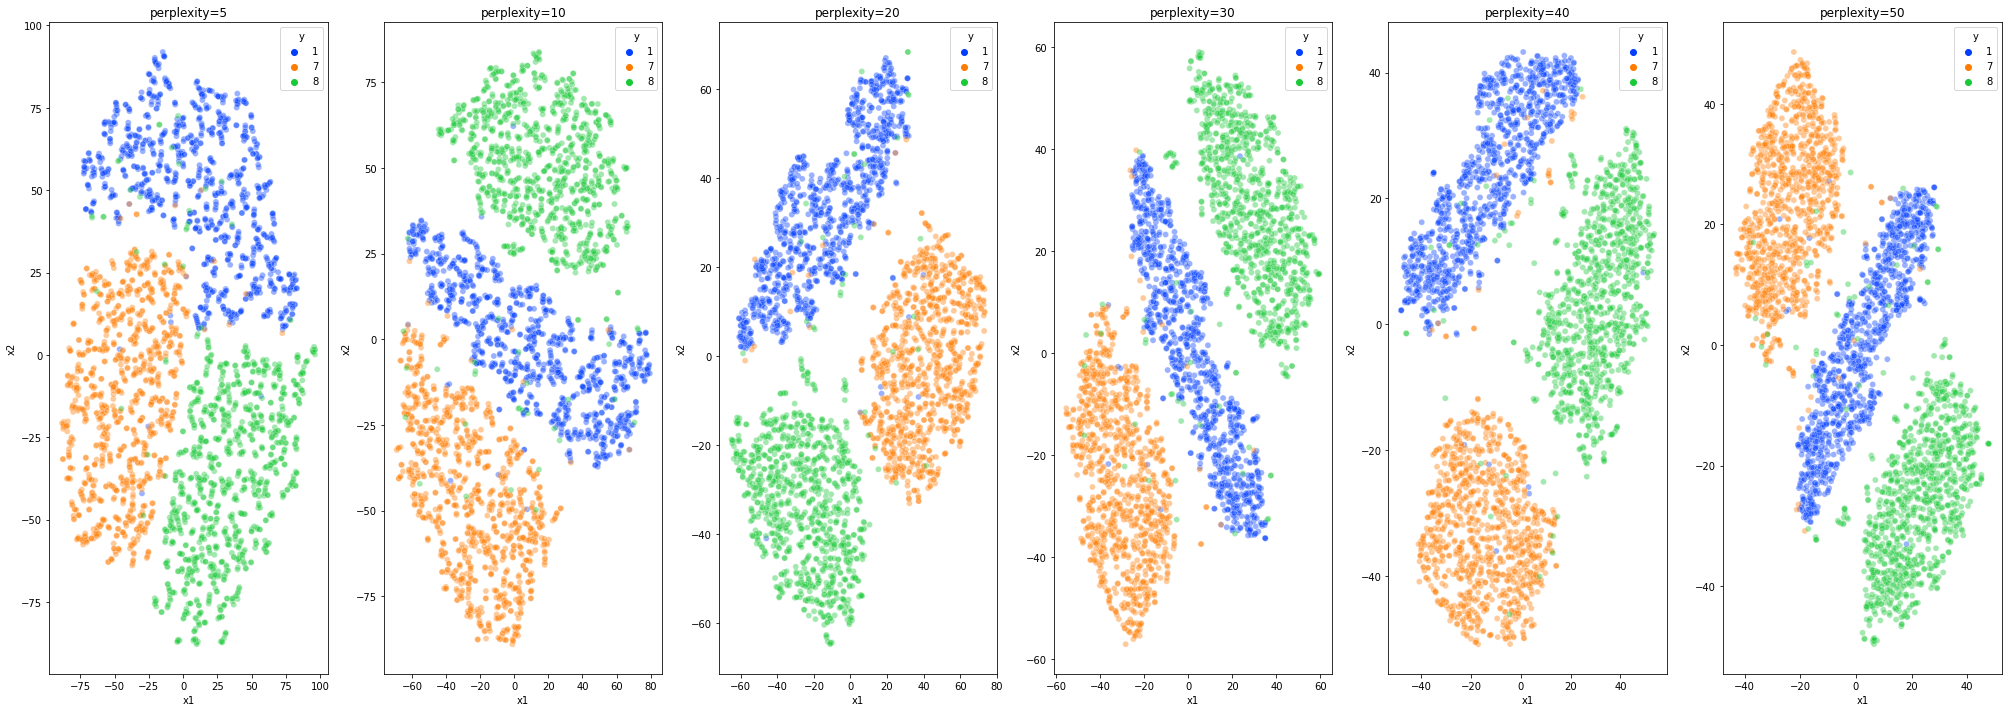

In [124]:
P=[5]+[10*i for i in range(1,6)]

fig,axes=pl.subplots(1,6,figsize=(28,10))

for i in range(6):
  model=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=P[i])
  TSNE_digits=model.fit_transform(x2)
  df=pd.DataFrame({"x1":TSNE_digits[:,0],"x2":TSNE_digits[:,1],"y":y2.reshape(-1)})
  sns.scatterplot(x="x1",y="x2",hue="y",alpha=0.4,data=df,palette="bright",ax=axes[i])
  axes[i].set_title(f"perplexity={P[i]}")
pl.tight_layout()

We see that clusters are distant from each other for large values of perplexity. The default value of $30$ works well. For other values we don't see a big difference. For small values, clusters tend to get closer to each other.